# Carga de tablas 

In [1]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings("ignore")

datos = pd.read_excel('poblacion_indigena.xlsx')#se carga la base de datos

#Transformación de las variables categóricas

df = pd.DataFrame(data=datos) #Se crea un dataframe con los datos

# Códigos transformación de datos

In [2]:
from sklearn import preprocessing
from collections import defaultdict

df1 = df
d = defaultdict(preprocessing.LabelEncoder)


def SoloInt(X): #Método para saber si toda la columna es de int
    #for j in range (len(X)):
    if not(X.dtype == 'int64'):
            return False
    return True


labels = []
for c in datos:
    labels.append(c)#Contiene todas las características de la base de datos


for i in range (len(labels)):
    if not (SoloInt(df[labels[i]])):
        # Codificando la variable
        df1[labels[i]] = df1[labels[i]].astype(str)
        df1[labels[i]] = d[labels[i]].fit_transform(df[labels[i]])


datosCodificados = df1

for i in range (len(labels)):
    if (labels[i] in d):
        if isinstance(d[labels[i]].classes_[0], str):
            index = np.where(d[labels[i]].classes_ == 'Nulo')[0]
            datosCodificados[labels[i]].replace(index, np.nan , inplace = True)
    else:
        datosCodificados[labels[i]].replace(-1, np.nan , inplace = True)

        
datosCodificados

,beneficiarios_etnias_psicosocial.fecha_nacimiento,beneficiarios_etnias_psicosocial.edad,beneficiarios_etnias_psicosocial.estado_civil,beneficiarios_etnias_psicosocial.tipo_afiliacion_ss,beneficiarios_etnias_psicosocial.estrato,beneficiarios_etnias_psicosocial.sisben,beneficiarios_etnias_psicosocial.estudia,beneficiarios_etnias_psicosocial.comunaresidencia,beneficiarios_etnias_psicosocial.etnia
0,NaN,NaN,NaN,1.0,NaN,0,0,5.0,1.0
1,NaN,NaN,NaN,1.0,NaN,0,0,8.0,1.0
2,NaN,NaN,NaN,1.0,NaN,0,0,NaN,1.0
3,2016.0,2.0,NaN,1.0,NaN,0,0,NaN,1.0
4,NaN,NaN,NaN,1.0,NaN,0,0,5.0,1.0
5,NaN,NaN,4.0,1.0,NaN,0,0,14.0,1.0
6,NaN,NaN,4.0,NaN,NaN,0,0,0.0,1.0
7,1965.0,53.0,5.0,1.0,0.0,51,0,14.0,1.0
8,1946.0,72.0,NaN,1.0,NaN,16,0,6.0,2.0
9,NaN,NaN,4.0,1.0,NaN,46,0,NaN,1.0


# Empieza tratamiento de Datos - Llenado de Datos

In [3]:
from sklearn.impute import SimpleImputer

#Llenar datos vacíos y pasar de DataFrame a Matriz
estrategia = SimpleImputer(strategy = 'most_frequent') #Se rellenan los datos faltantes por el método de el dato más frecuente
datosNuevos = estrategia.fit_transform(datosCodificados)

  
labels = []
for c in df:
    labels.append(c)


df_completo = pd.DataFrame(data=datosNuevos, columns=labels)#Creamos un nuevo df para el manejo de outliers

# Manejo de outliers

In [4]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .01
    high = .99
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] >= quant_df.loc[low, name]) & (df[name] <= quant_df.loc[high, name])]
    return df



df_sinOutLiers = remove_outlier(df_completo)
datosNuevos = df_sinOutLiers.values
df_sinOutLiers

,beneficiarios_etnias_psicosocial.fecha_nacimiento,beneficiarios_etnias_psicosocial.edad,beneficiarios_etnias_psicosocial.estado_civil,beneficiarios_etnias_psicosocial.tipo_afiliacion_ss,beneficiarios_etnias_psicosocial.estrato,beneficiarios_etnias_psicosocial.sisben,beneficiarios_etnias_psicosocial.estudia,beneficiarios_etnias_psicosocial.comunaresidencia,beneficiarios_etnias_psicosocial.etnia
0,1994.0,27.0,4.0,1.0,1.0,0.0,0.0,5.0,1.0
1,1994.0,27.0,4.0,1.0,1.0,0.0,0.0,8.0,1.0
2,1994.0,27.0,4.0,1.0,1.0,0.0,0.0,5.0,1.0
3,2016.0,2.0,4.0,1.0,1.0,0.0,0.0,5.0,1.0
4,1994.0,27.0,4.0,1.0,1.0,0.0,0.0,5.0,1.0
5,1994.0,27.0,4.0,1.0,1.0,0.0,0.0,14.0,1.0
6,1994.0,27.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0
7,1965.0,53.0,5.0,1.0,0.0,51.0,0.0,14.0,1.0
8,1946.0,72.0,4.0,1.0,1.0,16.0,0.0,6.0,2.0
9,1994.0,27.0,4.0,1.0,1.0,46.0,0.0,5.0,1.0


# Escalamiento de Datos

In [5]:
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot # Librería para hacer gráficas


MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1

datosEscalados = MinMax_1.fit_transform(datosNuevos) # Transformación de los nuevos datos con una escala MinMax

fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(datosNuevos[:,1], datosNuevos[:,2], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(-5, 100) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(-1, 10) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Outilers') # Titulo de la gráfica
pyplot.xlabel('Edad') # Etiqueta del eje x
pyplot.ylabel('Esatdo Civil') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(datosEscalados[:,1], datosEscalados[:,2], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(-0.5, 1.5) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(-0.5,  1.5) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con MinMax') # Titulo de la gráfica
pyplot.xlabel('Edad') # Etiqueta del eje x
pyplot.ylabel('Esatdo Civil') # Etiqueta del eje y

pyplot.show()

<Figure size 1200x500 with 2 Axes>

# Normalización de Datos

In [6]:
xmax = np.amax(datosNuevos, axis=0) # Se determina los máximos valores de la matriz de datos por columna
xmin = np.amin(datosNuevos, axis=0) # Se determina los minimos valores de la matriz de datos por columna
N,D = datosNuevos.shape # Dimenisones de los datos

metodo_4 = np.zeros( (N,D) ) # Se construye una matriz de ceros de N x D para luego actualizar con los datos nuevos
for d in np.arange(D):
    for n in np.arange(N):
        metodo_4[n][d] = (datosNuevos[n][d] - xmin[d])/(xmax[d] - xmin[d]) # Se aplica el método 4

metodo_4

array([[0.77      , 0.25742574, 0.8       , ..., 0.        , 0.35714286,
        0.        ],
       [0.77      , 0.25742574, 0.8       , ..., 0.        , 0.57142857,
        0.        ],
       [0.77      , 0.25742574, 0.8       , ..., 0.        , 0.35714286,
        0.        ],
       ...,
       [0.74      , 0.25742574, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.71      , 0.2970297 , 0.        , ..., 0.        , 0.35714286,
        0.        ],
       [0.81      , 0.18811881, 1.        , ..., 0.        , 0.14285714,
        0.        ]])

# Reducción de dimensionalidad

In [7]:
from sklearn.decomposition import PCA # Cargamos el método PCA

Componentes = PCA(iterated_power='auto', n_components = 9, random_state=None,
                  svd_solver='auto', tol=0.0, whiten=False) # Calcular los valores de las componentes principales


Variables_Principales = Componentes.fit_transform(datosEscalados) 
# Transformarmos las componentes principales a partir de los datos 

Varianza = Componentes.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las 
                                                 # componentes principales   
Varianza

array([3.59783506e-01, 1.77088424e-01, 1.29045243e-01, 9.82201494e-02,
       7.58208189e-02, 6.70111539e-02, 4.86377567e-02, 4.42214751e-02,
       1.71473244e-04])

[0.35978351 0.53687193 0.66591717 0.76413732 0.83995814 0.90696929
 0.95560705 0.99982853 1.        ]


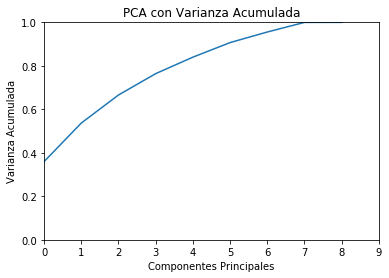

In [8]:
#Varianza acumulada
fil, col = datosEscalados.shape

ALL_PCA = PCA(col, random_state=None,
                 svd_solver='auto', tol=0.0, whiten=False).fit(datosEscalados)
ALL_Componentes = np.cumsum(ALL_PCA.explained_variance_ratio_)
print(ALL_Componentes)

pyplot.plot(np.arange(len(ALL_Componentes)), ALL_Componentes)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Varianza Acumulada')
pyplot.title('PCA con Varianza Acumulada')
pyplot.xlim(0, len(ALL_Componentes))
pyplot.ylim(0, 1)
pyplot.show()

In [9]:
Valores_Singulares = Componentes.singular_values_ # Se calcula los valores singulares por componente principal
Valores_Singulares #Para verificar cuales componentes son las que acumulan la mayor cantidad de información

array([8.88576973, 6.23403901, 5.32163924, 4.64274387, 4.07914051,
       3.83484644, 3.26709075, 3.11523664, 0.19398699])

In [10]:
#Se usa el 95% de varianza para explicar el modelo
Nuevas_Componentes = PCA(0.95, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False) 
Nuevos_Datos = Nuevas_Componentes.fit_transform(datosEscalados) 
print(datosEscalados.shape) # Tamaño de los datos originales
print(Nuevos_Datos.shape)

(461, 9)
(461, 7)


In [11]:
X_Reconstruido = Nuevas_Componentes.inverse_transform(Nuevos_Datos)#Se reconstruye el modelo a partir de las componentes principales
X_Reconstruido.shape

(461, 9)

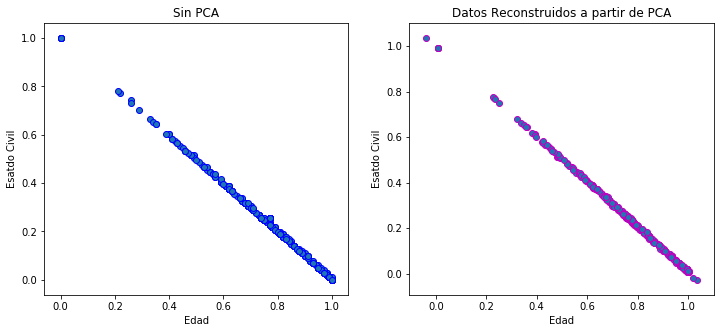

In [12]:
#Comparación gráfica con PCA y sin PCA
fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura 

ax = fig.add_subplot(1, 2, 1) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.xlabel('Edad') # Etiqueta del eje x
pyplot.ylabel('Esatdo Civil') # Etiqueta del eje y
pyplot.title('Sin PCA')

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(X_Reconstruido[:,0], X_Reconstruido[:,1], edgecolors="m")
pyplot.xlabel('Edad') # Etiqueta del eje x
pyplot.ylabel('Esatdo Civil') # Etiqueta del eje y
pyplot.title('Datos Reconstruidos a partir de PCA')

pyplot.show()

# K MEANS

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecati

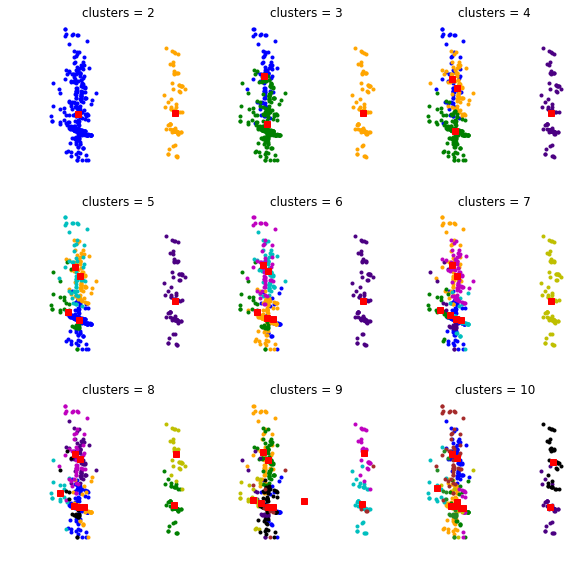

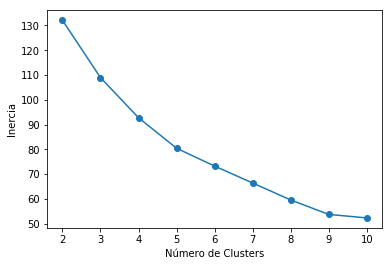

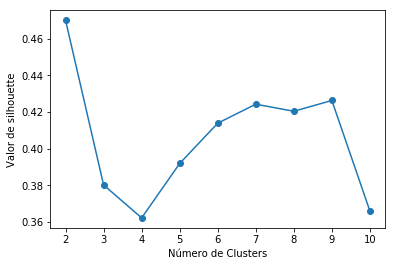

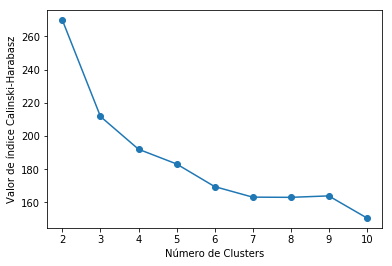

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabaz_score # Método de validación Calinski-Harabasz

from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy

mantener_valor_aleatorio = check_random_state(1000)
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

inercia = []
silhouette_valores = []
ch_valores = []

colors = ['b', 'orange', 'g', 'indigo', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = pyplot.subplots(3, 3, figsize=(8, 8))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    # Se construye el modelo Kmeans
    # n_clusters es el número de clusters
    # init es la condición inicial de los centros. 'random' signfica que se genera aleatoriamente los centros.
    # Se puede usar en int la opción ‘k-means++’, el cual selecciona los centros iniciales del cluster para
    # que el algoritmo de una manera inteligente converga rápidamente. Se aconseja usar esta opción para datos de alta
    # dimensionalidad.
    # n_init es el número de veces que el algoritmo actualiza los centros. Por defecto es 10 pero puedes cambiar el valor.
    # tol es el error que se desea superar.
    # max_iter es el número de iteraciones.
    # precompute_distances es una opción para pre-calcular las distancias. Si seleccionas 'True', entonces siempre se pre-calcula
    # las distancias. Si es 'False', entonces nunca se pre-calcula las distancias. Si es 'auto', entonces se selecciona
    # 'True' o 'False' de acuerdo al número de muestras y el número de clases. Se recomienda esta última opción.
    # algorithm es el algoritmo K-means a utilizar. Si es "full", se aplica el estilo clásico del algoritmo. Si es "elkan",
    # se aplica una variación del algoritmo k-means para mayor eficiencia pero se recomienda para datos que no esten tan
    # esparcidos. Si es "auto", entonces selecciona "elkan" si los datos son densos o "full" si los datos son esparcidos.
    Modelo_Kmeans = KMeans(n_clusters = ncenters, init = 'random', n_init = 20, max_iter = 1000, tol = 1e-4,
                      precompute_distances = 'auto', random_state = mantener_valor_aleatorio, algorithm = 'auto')
    Modelo_Kmeans.fit_predict(Nuevos_Datos) # se predice las etiquetas que se asocian a los datos
    Etiquetas = Modelo_Kmeans.labels_ # Calcula las clases o etiquetas
    centros = Modelo_Kmeans.cluster_centers_ # Calcula la matriz de centros
    inercia.append(Modelo_Kmeans.inertia_) # optimiza el punto de inercia de acuerdo al número de clusters
    silhouette_valores.append(silhouette_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Silhouette
    ch_valores.append(calinski_harabaz_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Calinski-Harabasz
    
    for j in range(ncenters):
        ax.plot(xpts[Etiquetas == j],
                ypts[Etiquetas == j], '.', color=colors[j])

    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
    
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off') 

fig1.tight_layout()
pyplot.show()

fig2, ax2 = pyplot.subplots()
ax2.plot(np.r_[2:11], inercia, marker = 'o')
ax2.set_xlabel("Número de Clusters")
ax2.set_ylabel("Inercia")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], silhouette_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de silhouette")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], ch_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de índice Calinski-Harabasz")
pyplot.show()

# GK-Means


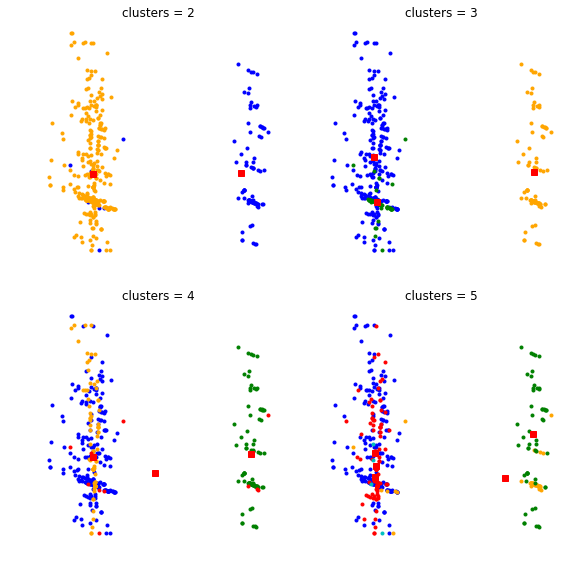

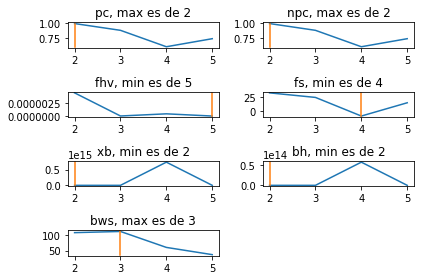

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy
from skcmeans.algorithms import Probabilistic, GustafsonKesselMixin # Algoritmo GK probabilístico

from cvi import * # Indices de validación interna

# cvi es una librería desarrollada por 99991
# ir a la url: https://github.com/99991/FuzzyClustering/blob/master/cvi.py
# pip install git+git://github.com/bm424/scikit-cmeans.git@master


class GKProbabilistic(Probabilistic, GustafsonKesselMixin):
    pass
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

fig1, axes1 = plt.subplots(2, 2, figsize=(8, 8))
resultados = []
cs = np.arange(2, 6) # Rango de número mínimo y máximo de clusters
mantener_valor_aleatorio = check_random_state(1000)

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    modelo_GK = GKProbabilistic(n_clusters = ncenters, n_init = 20, max_iter = 300, 
                                tol=1e-3, verbosity = 0, random_state = mantener_valor_aleatorio, eps = 1e-18)
    Ajuste = modelo_GK.fit(Nuevos_Datos)
    U = Ajuste.calculate_memberships(Nuevos_Datos)
    centros = Ajuste.calculate_centers(Nuevos_Datos)
    cluster_membership = np.argmax(U.T, axis=0)
    
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])
    
    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
        
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off')
    
    resultados.append([])
    for method in methods:
        resultado = method(Nuevos_Datos, U.T, centros, m = 2)
        resultados[-1].append(resultado)

plt.tight_layout()
plt.show()

resultados = np.array(resultados)

ny = 4
nx = 2

for i, method in enumerate(methods):
    plt.subplot(ny, nx, 1 + i)
    column = resultados[:, i]
    plt.plot(cs, column)
    if targets[i] == "min":
        ncenters = cs[np.argmin(column)]
    else:
        ncenters = cs[np.argmax(column)]
    plt.title("%s, %s es de %d"%(method.__name__, targets[i], ncenters))   
    plt.plot([ncenters, ncenters],[np.min(column), np.max(column)])

plt.tight_layout()
plt.show()

In [52]:
# Por consiguiente, la base de datos con datos y etiquetas sería con 3 clases

ncenters = 2

modelo_GK = GKProbabilistic(n_clusters = ncenters, n_init = 20, max_iter = 300, 
                                tol=1e-3, verbosity = 0, random_state = mantener_valor_aleatorio, eps = 1e-18)
Ajuste = modelo_GK.fit(Nuevos_Datos)

U = Ajuste.calculate_memberships(Nuevos_Datos)

Target = np.argmax(U.T, axis=0)

print(len(Target))

Datos_para_clasificar = Nuevos_Datos

Clases = Target

print("Para ", ncenters, " Clusters: ")   
for i in range (len(np.unique(Clases))):       
    print("El total de datos de la clase ", i, " son: ", len(Clases[Clases==i]))


461
Para  2  Clusters: 
El total de datos de la clase  0  son:  100
El total de datos de la clase  1  son:  361
